In [124]:
# Importamos las librerías necesarias
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [3]:
# Fijamos url de la web
url = 'https://tarifaluzhora.es/'

# Hacemos la petición a la página
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Obtenemos las horas
horas = soup.find_all('span', itemprop="description")

# Obtenemos los precios
precios = soup.find_all('span', itemprop="price")

# Obtenemos la fecha
date = soup.find('input', {'name': 'date'}).get('value')

# Creamos un array con el contenido de las horas
columnas = ['fecha']
for h in horas:
    columnas.append(h.text)

# Creamos un array con el contenido de los precios
contenido = [date]
for p in precios:
    contenido.append(p.text)


# Creamos un dataset con los datos del día actual, cuyas columnas son la fecha y las horas
df = pd.DataFrame(data=[np.array(contenido)], columns=columnas)
df

,fecha,00h - 01h:,01h - 02h:,02h - 03h:,03h - 04h:,04h - 05h:,05h - 06h:,06h - 07h:,07h - 08h:,08h - 09h:,...,14h - 15h:,15h - 16h:,16h - 17h:,17h - 18h:,18h - 19h:,19h - 20h:,20h - 21h:,21h - 22h:,22h - 23h:,23h - 24h:
0,05/04/2022,0.30614 €/kWh,0.29737 €/kWh,0.269 €/kWh,0.27546 €/kWh,0.28355 €/kWh,0.30304 €/kWh,0.28067 €/kWh,0.32942 €/kWh,0.36162 €/kWh,...,0.3683 €/kWh,0.36857 €/kWh,0.36682 €/kWh,0.3663 €/kWh,0.42192 €/kWh,0.43025 €/kWh,0.44157 €/kWh,0.43377 €/kWh,0.38235 €/kWh,0.37751 €/kWh


In [4]:
# Creamos array vacio de urls
urls=[]

# Recorremos rango de fechas hacia atrás
for i in range(2022, 2020, -1):
    # Si la fecha es 2022 solo queremos los tres primeros meses
    if i==2022:
        for j in range(3,0,-1):
            # Para febrero sólo recorremos 28 días
            if j==2:
                for k in range(28,0,-1):
                    url = 'https://tarifaluzhora.es/?tarifa=pcb&fecha='+str(k).zfill(2)+'%2F'+str(j).zfill(2)+'%2F'+str(i)
                    urls.append(url)
            else:
                # Para el resto de meses recorremos 31
                for k in range(31,0,-1):
                    url = 'https://tarifaluzhora.es/?tarifa=pcb&fecha='+str(k).zfill(2)+'%2F'+str(j).zfill(2)+'%2F'+str(i)
                    urls.append(url)
    # Si la fecha es 2021 solo queremos hasta junio
    else:
        for j in range(12,5,-1):
            # Para junio, septiembre y noviembre recorremos 30 días
            if (j==6) | (j==9) | (j==11):
                for k in range(30,0,-1):
                    url = 'https://tarifaluzhora.es/?tarifa=pcb&fecha='+str(k).zfill(2)+'%2F'+str(j).zfill(2)+'%2F'+str(i)
                    urls.append(url)
            else:
                # Para el resto recorremos 31 días
                for k in range(31,0,-1):
                    url = 'https://tarifaluzhora.es/?tarifa=pcb&fecha='+str(k).zfill(2)+'%2F'+str(j).zfill(2)+'%2F'+str(i)
                    urls.append(url)

In [6]:
# Recorremos el array de urls
for i in urls:
    # Fijamos url de la web
    url = i

    # Hacemos la petición a la página
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Obtenemos los precios
    precios = soup.find_all('span', itemprop="price")

    # Obtenemos la fecha
    fecha = soup.find('input', {'name': 'date'}).get('value')

    # Creamos un array con el contenido de las horas
    columnas = ['fecha']
    for h in horas:
        columnas.append(h.text)

    # Creamos un array con el contenido de los precios
    contenido = [fecha]
    for p in precios:
        contenido.append(p.text)

    # Creamos el df
    df1 = pd.DataFrame(data=[np.array(contenido)], columns=columnas)

    # Lo unimos al df original para crear la bd
    df = pd.concat([df, df1])

In [7]:
print(float(precios[1].text.split(' ')[0]))
print(type(float(precios[1].text.split(' ')[0])))

0.11595
<class 'float'>


In [8]:
# Cabecera del dataset
df.head()

,fecha,00h - 01h:,01h - 02h:,02h - 03h:,03h - 04h:,04h - 05h:,05h - 06h:,06h - 07h:,07h - 08h:,08h - 09h:,...,14h - 15h:,15h - 16h:,16h - 17h:,17h - 18h:,18h - 19h:,19h - 20h:,20h - 21h:,21h - 22h:,22h - 23h:,23h - 24h:
0,05/04/2022,0.30614 €/kWh,0.29737 €/kWh,0.269 €/kWh,0.27546 €/kWh,0.28355 €/kWh,0.30304 €/kWh,0.28067 €/kWh,0.32942 €/kWh,0.36162 €/kWh,...,0.3683 €/kWh,0.36857 €/kWh,0.36682 €/kWh,0.3663 €/kWh,0.42192 €/kWh,0.43025 €/kWh,0.44157 €/kWh,0.43377 €/kWh,0.38235 €/kWh,0.37751 €/kWh
0,31/03/2022,0.34653 €/kWh,0.33138 €/kWh,0.33063 €/kWh,0.32335 €/kWh,0.3171 €/kWh,0.32118 €/kWh,0.32683 €/kWh,0.34811 €/kWh,0.38216 €/kWh,...,0.26185 €/kWh,0.25855 €/kWh,0.24957 €/kWh,0.25059 €/kWh,0.31642 €/kWh,0.36794 €/kWh,0.41866 €/kWh,0.42199 €/kWh,0.34661 €/kWh,0.30279 €/kWh
0,30/03/2022,0.33468 €/kWh,0.31902 €/kWh,0.30903 €/kWh,0.29593 €/kWh,0.29989 €/kWh,0.3092 €/kWh,0.32472 €/kWh,0.32824 €/kWh,0.37147 €/kWh,...,0.33943 €/kWh,0.33612 €/kWh,0.32761 €/kWh,0.31185 €/kWh,0.39006 €/kWh,0.4168 €/kWh,0.43635 €/kWh,0.44541 €/kWh,0.35615 €/kWh,0.35182 €/kWh
0,29/03/2022,0.30449 €/kWh,0.2824 €/kWh,0.27649 €/kWh,0.27374 €/kWh,0.27725 €/kWh,0.29108 €/kWh,0.32639 €/kWh,0.32426 €/kWh,0.36677 €/kWh,...,0.32994 €/kWh,0.32321 €/kWh,0.31876 €/kWh,0.33254 €/kWh,0.40217 €/kWh,0.40538 €/kWh,0.41921 €/kWh,0.42276 €/kWh,0.33883 €/kWh,0.32508 €/kWh
0,28/03/2022,0.28296 €/kWh,0.27426 €/kWh,0.26973 €/kWh,0.26371 €/kWh,0.26316 €/kWh,0.278 €/kWh,0.3068 €/kWh,0.30449 €/kWh,0.33477 €/kWh,...,0.2937 €/kWh,0.28725 €/kWh,0.2872 €/kWh,0.28162 €/kWh,0.39677 €/kWh,0.41407 €/kWh,0.45403 €/kWh,0.44684 €/kWh,0.34658 €/kWh,0.33382 €/kWh


In [9]:
# Cola del dataset
df.tail()

,fecha,00h - 01h:,01h - 02h:,02h - 03h:,03h - 04h:,04h - 05h:,05h - 06h:,06h - 07h:,07h - 08h:,08h - 09h:,...,14h - 15h:,15h - 16h:,16h - 17h:,17h - 18h:,18h - 19h:,19h - 20h:,20h - 21h:,21h - 22h:,22h - 23h:,23h - 24h:
0,05/06/2021,0.1034 €/kWh,0.09697 €/kWh,0.09435 €/kWh,0.09548 €/kWh,0.09431 €/kWh,0.09451 €/kWh,0.09376 €/kWh,0.09609 €/kWh,0.10283 €/kWh,...,0.10482 €/kWh,0.10025 €/kWh,0.09899 €/kWh,0.09859 €/kWh,0.09919 €/kWh,0.09966 €/kWh,0.1073 €/kWh,0.11092 €/kWh,0.1113 €/kWh,0.10722 €/kWh
0,04/06/2021,0.10312 €/kWh,0.10295 €/kWh,0.10252 €/kWh,0.10581 €/kWh,0.10577 €/kWh,0.10825 €/kWh,0.11109 €/kWh,0.11252 €/kWh,0.14952 €/kWh,...,0.13715 €/kWh,0.13409 €/kWh,0.12952 €/kWh,0.13379 €/kWh,0.23188 €/kWh,0.23658 €/kWh,0.23832 €/kWh,0.23939 €/kWh,0.14442 €/kWh,0.14065 €/kWh
0,03/06/2021,0.10958 €/kWh,0.10608 €/kWh,0.10296 €/kWh,0.10445 €/kWh,0.10462 €/kWh,0.10753 €/kWh,0.11176 €/kWh,0.11282 €/kWh,0.14944 €/kWh,...,0.13265 €/kWh,0.12378 €/kWh,0.12341 €/kWh,0.12676 €/kWh,0.22634 €/kWh,0.23488 €/kWh,0.23745 €/kWh,0.24213 €/kWh,0.14956 €/kWh,0.14721 €/kWh
0,02/06/2021,0.1162 €/kWh,0.11437 €/kWh,0.11253 €/kWh,0.11287 €/kWh,0.11185 €/kWh,0.11197 €/kWh,0.11576 €/kWh,0.11564 €/kWh,0.15296 €/kWh,...,0.13851 €/kWh,0.13615 €/kWh,0.13227 €/kWh,0.13619 €/kWh,0.2312 €/kWh,0.23677 €/kWh,0.23927 €/kWh,0.245 €/kWh,0.15092 €/kWh,0.14831 €/kWh
0,01/06/2021,0.11633 €/kWh,0.11595 €/kWh,0.11489 €/kWh,0.11496 €/kWh,0.11484 €/kWh,0.11603 €/kWh,0.11629 €/kWh,0.1157 €/kWh,0.15289 €/kWh,...,0.13796 €/kWh,0.13288 €/kWh,0.13193 €/kWh,0.13599 €/kWh,0.23144 €/kWh,0.2404 €/kWh,0.2462 €/kWh,0.24808 €/kWh,0.15591 €/kWh,0.1565 €/kWh


In [30]:
# Convertimos todos los precios a datos de tipo float

for i in range(1,len(df.columns)):
    for j in range(0, len(df)):
        df.iloc[j][i] = float(df.iloc[j][i].split(' ')[0])

         fecha 00h - 01h: 01h - 02h: 02h - 03h: 03h - 04h: 04h - 05h:  \
0   05/04/2022    0.30614    0.29737      0.269    0.27546    0.28355   
0   31/03/2022    0.34653    0.33138    0.33063    0.32335     0.3171   
0   30/03/2022    0.33468    0.31902    0.30903    0.29593    0.29989   
0   29/03/2022    0.30449     0.2824    0.27649    0.27374    0.27725   
0   28/03/2022    0.28296    0.27426    0.26973    0.26371    0.26316   
..         ...        ...        ...        ...        ...        ...   
0   05/06/2021     0.1034    0.09697    0.09435    0.09548    0.09431   
0   04/06/2021    0.10312    0.10295    0.10252    0.10581    0.10577   
0   03/06/2021    0.10958    0.10608    0.10296    0.10445    0.10462   
0   02/06/2021     0.1162    0.11437    0.11253    0.11287    0.11185   
0   01/06/2021    0.11633    0.11595    0.11489    0.11496    0.11484   

   05h - 06h: 06h - 07h: 07h - 08h: 08h - 09h:  ... 14h - 15h: 15h - 16h:  \
0     0.30304    0.28067    0.32942    0.36162

In [33]:
# Añadimos una columna que indique en qué unindades se mide el precio de la luz

df = df.assign(unidad = ['€/kWh' for i in range(0, len(df))])
df

,fecha,00h - 01h:,01h - 02h:,02h - 03h:,03h - 04h:,04h - 05h:,05h - 06h:,06h - 07h:,07h - 08h:,08h - 09h:,...,15h - 16h:,16h - 17h:,17h - 18h:,18h - 19h:,19h - 20h:,20h - 21h:,21h - 22h:,22h - 23h:,23h - 24h:,unidad
0,05/04/2022,0.30614,0.29737,0.269,0.27546,0.28355,0.30304,0.28067,0.32942,0.36162,...,0.36857,0.36682,0.3663,0.42192,0.43025,0.44157,0.43377,0.38235,0.37751,€/kWh
0,31/03/2022,0.34653,0.33138,0.33063,0.32335,0.3171,0.32118,0.32683,0.34811,0.38216,...,0.25855,0.24957,0.25059,0.31642,0.36794,0.41866,0.42199,0.34661,0.30279,€/kWh
0,30/03/2022,0.33468,0.31902,0.30903,0.29593,0.29989,0.3092,0.32472,0.32824,0.37147,...,0.33612,0.32761,0.31185,0.39006,0.4168,0.43635,0.44541,0.35615,0.35182,€/kWh
0,29/03/2022,0.30449,0.2824,0.27649,0.27374,0.27725,0.29108,0.32639,0.32426,0.36677,...,0.32321,0.31876,0.33254,0.40217,0.40538,0.41921,0.42276,0.33883,0.32508,€/kWh
0,28/03/2022,0.28296,0.27426,0.26973,0.26371,0.26316,0.278,0.3068,0.30449,0.33477,...,0.28725,0.2872,0.28162,0.39677,0.41407,0.45403,0.44684,0.34658,0.33382,€/kWh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,05/06/2021,0.1034,0.09697,0.09435,0.09548,0.09431,0.09451,0.09376,0.09609,0.10283,...,0.10025,0.09899,0.09859,0.09919,0.09966,0.1073,0.11092,0.1113,0.10722,€/kWh
0,04/06/2021,0.10312,0.10295,0.10252,0.10581,0.10577,0.10825,0.11109,0.11252,0.14952,...,0.13409,0.12952,0.13379,0.23188,0.23658,0.23832,0.23939,0.14442,0.14065,€/kWh
0,03/06/2021,0.10958,0.10608,0.10296,0.10445,0.10462,0.10753,0.11176,0.11282,0.14944,...,0.12378,0.12341,0.12676,0.22634,0.23488,0.23745,0.24213,0.14956,0.14721,€/kWh
0,02/06/2021,0.1162,0.11437,0.11253,0.11287,0.11185,0.11197,0.11576,0.11564,0.15296,...,0.13615,0.13227,0.13619,0.2312,0.23677,0.23927,0.245,0.15092,0.14831,€/kWh


In [34]:
# Exportamos el dataframe a un documento .csv

df.to_csv(r'export_dataframe.csv', index = False, header=True)

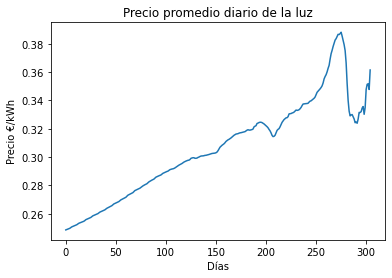

In [151]:
# Graficamos el precio promedio diario (305 días)

price_all = []
price_day_all = []


for j in range(0, len(df)):
    for i in range(1,len(df.columns)-1):
        price_all.append(df.iloc[j][i])
        
    price_day_all.append(st.mean(price_all))

price_day_all = list(reversed(price_day_all))    
dias = list(range(0, len(price_day_all)))

plt.xlabel("Días")
plt.ylabel("Precio €/kWh")
plt.title(f'Precio promedio diario de la luz')
plt.plot(dias, price_day_all)
plt.show()

In [152]:
# Graficamos el precio a escala hora y diaria (meses 6, 7, 8, 9, 10, 11, 12 del 2021 y meses 1, 2, 3 del 2022)

def graficas_meses(precio_hora, precio_dia, mes, mes_num):
    
    if (mes_num == "/01/" or mes_num == "/02/" or mes_num == "/03/"):
        year = 2022
        
    else:
        year = 2021
        
    precio_hora = list(reversed(precio_hora))
    horas = list(range(0, len(precio_hora)))
    
    print(f'El comportamiento del precio de la luz en {mes} de {year} es:\n')
    
    # Graficamos el precio de cada hora de todos los días del mes
    plt.plot(horas, precio_hora)
    plt.xlabel("Horas")
    plt.ylabel("Precio €/kWh")
    plt.title(f'Precio por horas de la luz en {mes} de {year}')
    plt.show()
    
    precio_dia = list(reversed(precio_dia))
    dia = list(range(0, len(precio_dia)))
    
    # Graficamos el precio promedio de cada día
    plt.plot(dia, precio_dia)
    plt.xlabel("Días")
    plt.ylabel("Precio €/kWh")
    plt.title(f'Precio promedio diario de la luz en {mes} de {year}')
    plt.show()
    
    print(f'El precio mínimo en {mes} de {year} fue de {round(min(precio_hora), 3)} €/kWh y el precio diario promedio mínimo fue de {round(min(precio_dia), 3)} €/kWh\n')
    print(f'El precio máximo en {mes} de {year} fue de {round(max(precio_hora), 3)} €/kWh y el precio diario promedio máximo fue de {round(max(precio_dia), 3)} €/kWh\n\n\n')
    

El comportamiento del precio de la luz en junio de 2021 es:



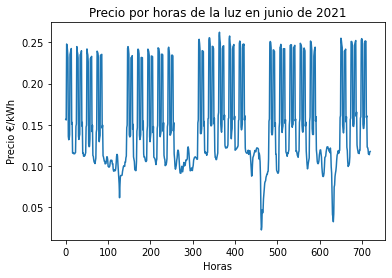

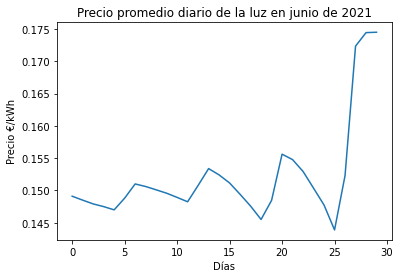

El precio mínimo en junio de 2021 fue de 0.022 €/kWh y el precio diario promedio mínimo fue de 0.144 €/kWh

El precio máximo en junio de 2021 fue de 0.262 €/kWh y el precio diario promedio máximo fue de 0.174 €/kWh



El comportamiento del precio de la luz en julio de 2021 es:



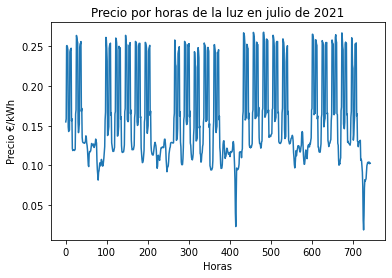

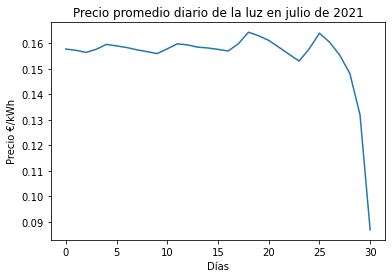

El precio mínimo en julio de 2021 fue de 0.019 €/kWh y el precio diario promedio mínimo fue de 0.087 €/kWh

El precio máximo en julio de 2021 fue de 0.268 €/kWh y el precio diario promedio máximo fue de 0.164 €/kWh



El comportamiento del precio de la luz en agosto de 2021 es:



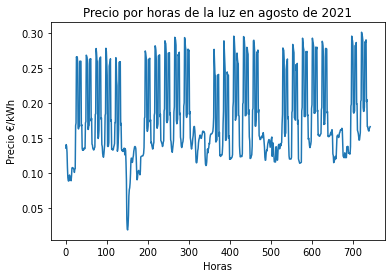

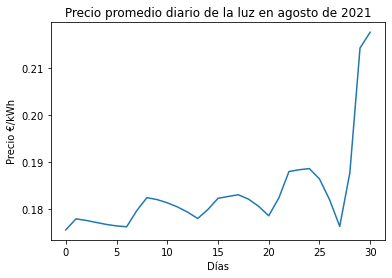

El precio mínimo en agosto de 2021 fue de 0.019 €/kWh y el precio diario promedio mínimo fue de 0.176 €/kWh

El precio máximo en agosto de 2021 fue de 0.301 €/kWh y el precio diario promedio máximo fue de 0.218 €/kWh



El comportamiento del precio de la luz en septiembre de 2021 es:



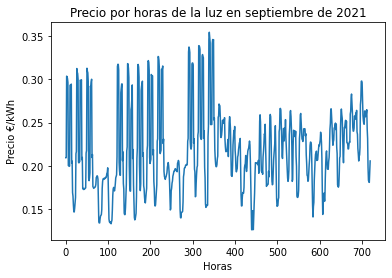

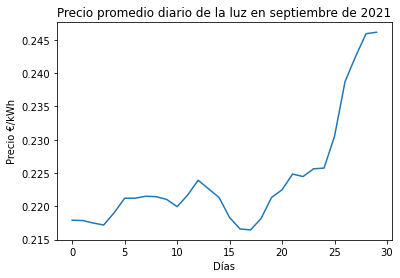

El precio mínimo en septiembre de 2021 fue de 0.126 €/kWh y el precio diario promedio mínimo fue de 0.216 €/kWh

El precio máximo en septiembre de 2021 fue de 0.354 €/kWh y el precio diario promedio máximo fue de 0.246 €/kWh



El comportamiento del precio de la luz en octubre de 2021 es:



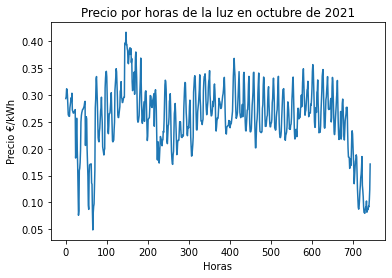

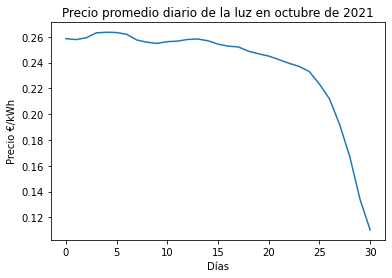

El precio mínimo en octubre de 2021 fue de 0.049 €/kWh y el precio diario promedio mínimo fue de 0.11 €/kWh

El precio máximo en octubre de 2021 fue de 0.417 €/kWh y el precio diario promedio máximo fue de 0.263 €/kWh



El comportamiento del precio de la luz en noviembre de 2021 es:



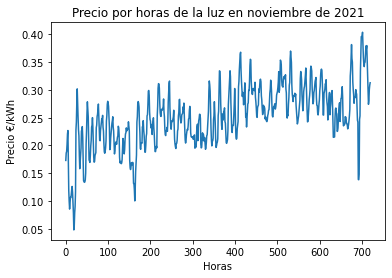

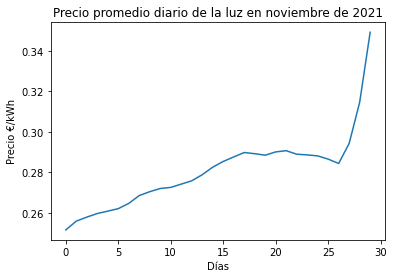

El precio mínimo en noviembre de 2021 fue de 0.048 €/kWh y el precio diario promedio mínimo fue de 0.252 €/kWh

El precio máximo en noviembre de 2021 fue de 0.404 €/kWh y el precio diario promedio máximo fue de 0.349 €/kWh



El comportamiento del precio de la luz en diciembre de 2021 es:



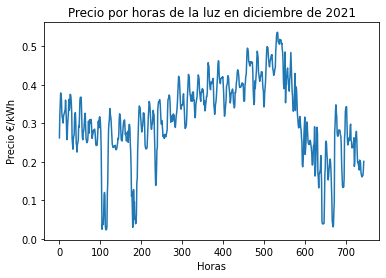

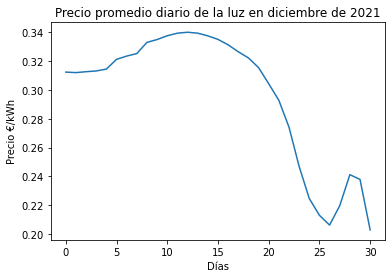

El precio mínimo en diciembre de 2021 fue de 0.023 €/kWh y el precio diario promedio mínimo fue de 0.203 €/kWh

El precio máximo en diciembre de 2021 fue de 0.537 €/kWh y el precio diario promedio máximo fue de 0.34 €/kWh



El comportamiento del precio de la luz en enero de 2022 es:



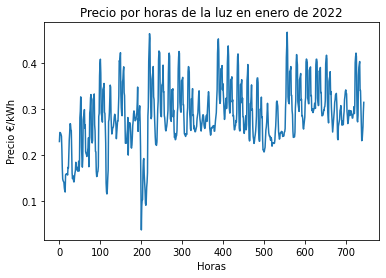

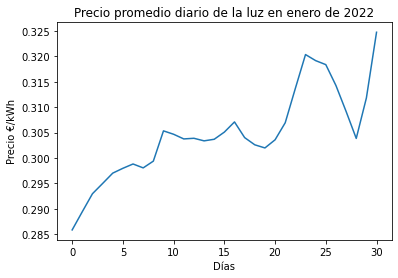

El precio mínimo en enero de 2022 fue de 0.036 €/kWh y el precio diario promedio mínimo fue de 0.286 €/kWh

El precio máximo en enero de 2022 fue de 0.467 €/kWh y el precio diario promedio máximo fue de 0.325 €/kWh



El comportamiento del precio de la luz en febrero de 2022 es:



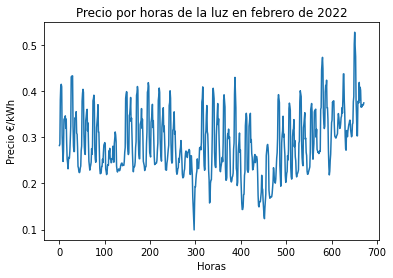

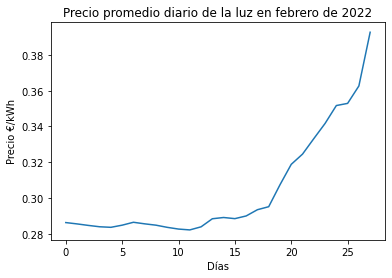

El precio mínimo en febrero de 2022 fue de 0.099 €/kWh y el precio diario promedio mínimo fue de 0.282 €/kWh

El precio máximo en febrero de 2022 fue de 0.528 €/kWh y el precio diario promedio máximo fue de 0.393 €/kWh



El comportamiento del precio de la luz en marzo de 2022 es:



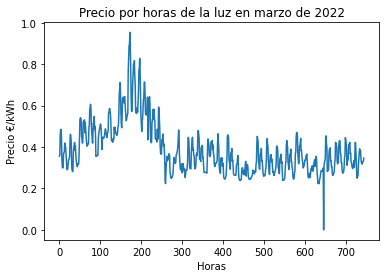

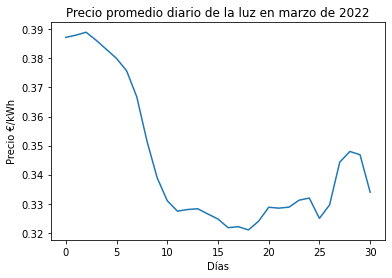

El precio mínimo en marzo de 2022 fue de 0.0 €/kWh y el precio diario promedio mínimo fue de 0.321 €/kWh

El precio máximo en marzo de 2022 fue de 0.954 €/kWh y el precio diario promedio máximo fue de 0.389 €/kWh





In [153]:
mes = {'junio':'/06/', 'julio':'/07/', 'agosto':'/08/', 'septiembre':'/09/', 'octubre':'/10/', 'noviembre':'/11/', 'diciembre':'/12/', 
       'enero':'/01/', 'febrero':'/02/', 'marzo':'/03/'}

# Escogemos un sub-dataframe para cada mes y graficarlo por separado
for i in range(0, len(mes)):
    price_hour = []
    price_day = []
    df_month = df[df["fecha"].str.contains(list(mes.values())[i])]
    
    
    for j in range(0, len(df_month)):
        for k in range(1, len(df_month.columns)-1):
            # Se selecciona el precio de cada hora
            price_hour.append(df_month.iloc[j][k])
        
        # Se promedia el precio de cada día
        price_day.append(st.mean(price_hour))
            
    # Llamamos a la función encargada de graficar
    graficas_meses(price_hour, price_day, list(mes.keys())[i], list(mes.values())[i])